In [7]:
import pandas as pd
import seaborn as sns

In [86]:
corrected_pvalues_df = pd.read_csv("figures/summary_data/all_experiment_percent_modification_corrected_pvalues_chi2.csv", 
                                   index_col=0)
other_percent_mod = pd.read_csv("/Users/andrewbailey/Desktop/mod_file.csv", 
                                   index_col=0)
other_percent_mod[["WT_YPD_mean", "WT_YPD2_mean", "WT_YPD3_mean"]] = corrected_pvalues_df[["WT_YPD_mean", "WT_YPD2_mean", "WT_YPD3_mean"]]
other_percent_mod = other_percent_mod.drop(columns=["error_ms", "error_rms1", "error_rms2"]).dropna()

In [87]:
ranges = pd.concat([other_percent_mod["percent_hplc"] - other_percent_mod["error_hplc"], other_percent_mod["percent_hplc"] + other_percent_mod["error_hplc"] , 
 other_percent_mod["percent_rms1"], other_percent_mod["percent_rms2"], other_percent_mod["percent_ms"]], axis=1)

In [88]:
other_percent_mod[["WT_YPD_mean", "WT_YPD2_mean", "WT_YPD3_mean"]]

,WT_YPD_mean,WT_YPD2_mean,WT_YPD3_mean
pos,,,
28,0.963450,0.962741,0.964200
100,0.751462,0.756371,0.752407
414,0.915205,0.919305,0.918472
420,0.826998,0.843629,0.842058
436,0.828460,0.841120,0.836643
541,0.944932,0.934556,0.945397
562,0.793860,0.700193,0.776023
578,0.961014,0.958687,0.956227
619,0.960039,0.965830,0.961793


In [89]:
other_percent_mod["contig"] == "RDN18-1"

pos
28       True
100      True
414      True
420      True
436      True
541      True
562      True
578      True
619      True
796      True
974      True
1007     True
1126     True
1269     True
1271     True
1428     True
1572     True
1639     True
649     False
650     False
663     False
805     False
807     False
817     False
867     False
876     False
898     False
908     False
1133    False
1437    False
1449    False
1450    False
1888    False
2197    False
2220    False
2256    False
2280    False
2281    False
2288    False
2337    False
2347    False
2417    False
2421    False
2619    False
2640    False
2724    False
2729    False
2791    False
2793    False
2815    False
2921    False
2922    False
2946    False
2948    False
2959    False
Name: contig, dtype: bool

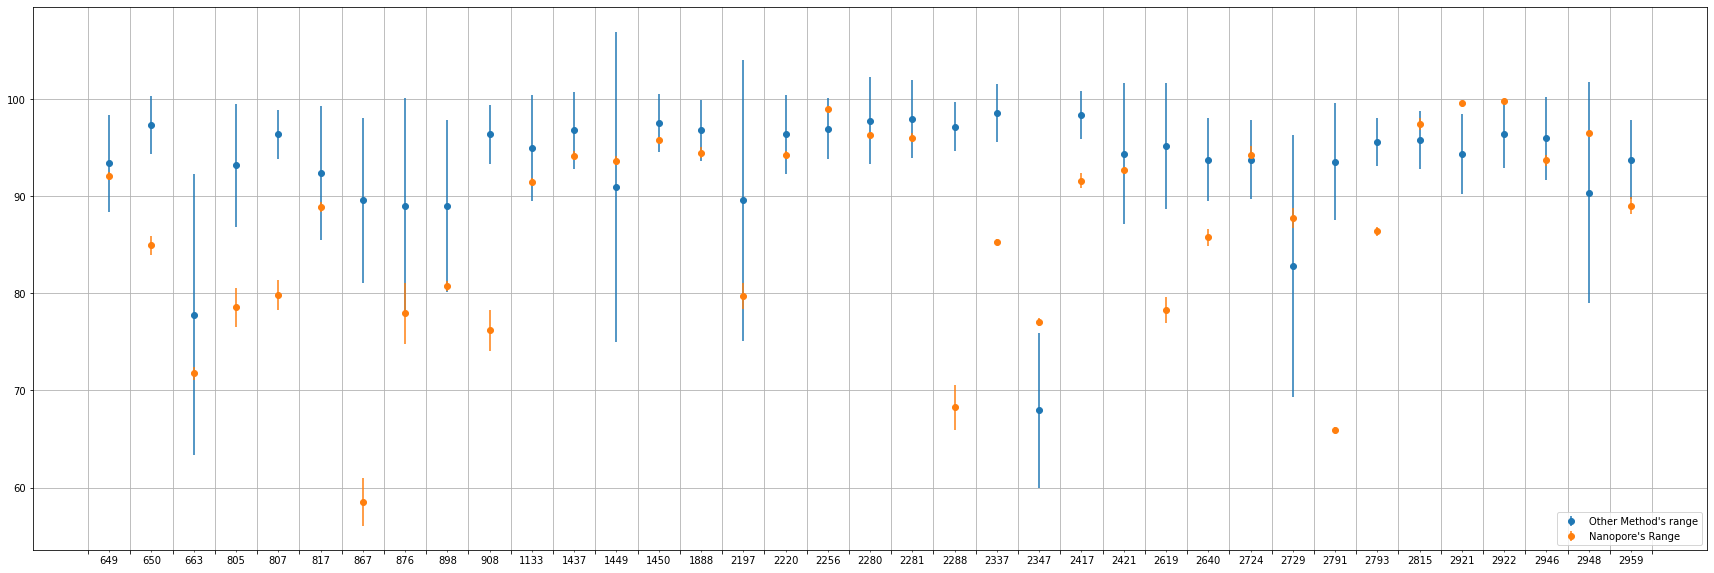

In [131]:
import numpy as np
import matplotlib.pyplot as plt
contig = "25S"
figure_path = f"/Users/andrewbailey/Desktop/percent_mod_variation_{contig}.png"

other_error = ((ranges.min(axis=1) - ranges.max(axis=1)) / 2).values
other_y = ranges.mean(axis=1).values

np_error = ((other_percent_mod[["WT_YPD_mean", "WT_YPD2_mean", "WT_YPD3_mean"]].max(axis=1) - 
             other_percent_mod[["WT_YPD_mean", "WT_YPD2_mean", "WT_YPD3_mean"]].min(axis=1)) / 2).values * 100    
np_y = other_percent_mod[["WT_YPD_mean", "WT_YPD2_mean", "WT_YPD3_mean"]].mean(axis=1).values * 100

if contig == "18S":
    selector = (other_percent_mod["contig"] == "RDN18-1").values
else:
    selector = (other_percent_mod["contig"] == "RDN25-1").values

    
x = np.array(range(len(ranges[selector])))

fig, axs = plt.subplots(figsize=(30,10))

plt.errorbar(x, 
             other_y[selector], 
             yerr=other_error[selector], 
             label="Other Method's range", fmt='o')
plt.errorbar(x, 
             np_y[selector], 
             yerr=np_error[selector], label="Nanopore's Range", fmt='o')


axs.set_xticks(ticks=[x for x in range(len(x))], minor=True)
axs.set_xticks(ticks=[x-0.5 for x in range(len(x)+1)], minor=False)
axs.set_xticklabels(labels=ranges.index[selector], minor=True)
axs.set_xticklabels(labels=["" for x in x], minor=False)

# axs.set_xticks(ticks=x, minor=False)
# axs.set_xticks(ticks=[i-.5 for i in x], minor=True)
# axs.set_xticklabels(labels=ranges.index[selector], minor=True)
# axs.set_xticklabels(labels=["" for i in x], minor=False)

# plt.xticks(ticks=x, labels=ranges.index[selector])
plt.grid(True)
plt.legend(loc='lower right')


if figure_path is not None:
    plt.savefig(figure_path)
else:
    plt.show()